In [21]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
%run Preprocessing.py

In [3]:
df = pd.read_csv("austin_weather.csv")

In [4]:
X_train, X_test, y_train, y_test, X_val, y_val = preprocess(df)

In [5]:
# We will train for Rain first
y_train_rain = y_train["Rain"]
y_val_rain = y_val["Rain"]

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [14]:
parameters = {
'n_estimators': [4, 6, 9],
'max_features': ['log2', 'sqrt','auto'],
'criterion': ['entropy', 'gini'],
'max_depth': [2, 3, 5, 10],
'min_samples_split': [2, 3, 5],
'min_samples_leaf': [1,5,8],
'random_state' : [101],
'class_weight' : ['balanced']
}

rfc = RandomForestClassifier()
clf = GridSearchCV(rfc, parameters, cv=5,verbose=1)
clf.fit(X_train, y_train_rain)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 3, 5, 10],
                         'max_features': ['log2', 'sqrt', 'auto'],
                         'min_samples_leaf': [1, 5, 8],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [4, 6, 9], 'random_state': [101]},
             verbose=1)

In [18]:
print(classification_report(y_val_rain, clf.predict(X_val)))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       140
           1       0.98      0.84      0.91        58

    accuracy                           0.95       198
   macro avg       0.96      0.92      0.94       198
weighted avg       0.95      0.95      0.95       198



<AxesSubplot: >

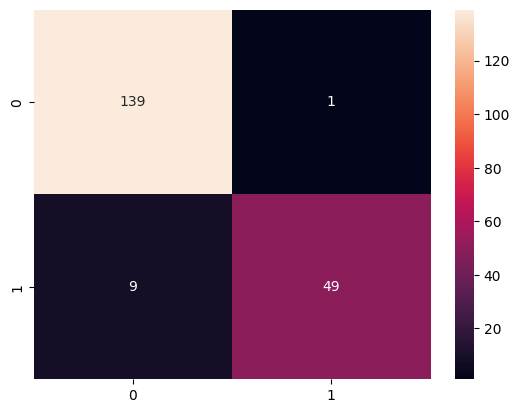

In [25]:
cm = confusion_matrix(y_val_rain, clf.predict(X_val))
sns.heatmap(cm, annot=True, fmt="d")

In [27]:
clf.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 9,
 'random_state': 101}